In [236]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import heapq

In [241]:
H_N = 2

class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y


class Node:
    def __init__(self, position: Position, start: Position, end: Position, parent=None):
        self.position = position
        self.parent = parent
        self.cost = AStar.total_cost(start, position, end)

    def __eq__(self, other):
        return self.position.x == other.position.x and self.position.y == other.position.y

    def __str__(self):
        return f'({self.position.x}, {self.position.y})'

    def __lt__(self, other):
        return self.cost < other.cost

    def __gt__(self, other):
        return self.cost > other.cost


class AStar:

    @staticmethod
    def base_cost(start: Position, curr: Position):
        return abs(start.x - curr.x) + abs(start.y - curr.y)

    @staticmethod
    def heuristic_cost(curr: Position, end: Position):
        return (end.x - curr.x)**H_N + 4 * (end.y - curr.y)**H_N

    @staticmethod
    def total_cost(start: Position, curr: Position, end: Position):
        return AStar.base_cost(start, curr) + AStar.heuristic_cost(curr, end)

    @staticmethod
    def build_path(end: Node) -> List[Node]:
        path = []
        curr = end
        while curr.parent:
            path.insert(0, curr)
            curr = curr.parent
        return path

    @staticmethod
    def find_path(map: np.array, start: Node, end: Node):
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]
        open_list = []
        closed_list = []
        open_list.append(start)
        heapq.heappush(open_list, start)
        while open_list:
            curr = heapq.heappop(open_list)
            if curr in closed_list:
                continue
            if curr == end:
                return AStar.build_path(curr), closed_list
            closed_list.append(curr)
            if map[curr.position.x, curr.position.y] == -1:
                continue
            for i in range(4):
                if curr.position.x + dx[i] >= 0 and curr.position.x + dx[i] < map.shape[0] and curr.position.y + dy[
                    i] >= 0 and curr.position.y + dy[i] < map.shape[1]:
                    heapq.heappush(open_list, (
                        Node(Position(curr.position.x + dx[i], curr.position.y + dy[i]), start.position, end.position,
                             curr)))
        return [], []

80


(-0.5, 59.5, 59.5, -0.5)

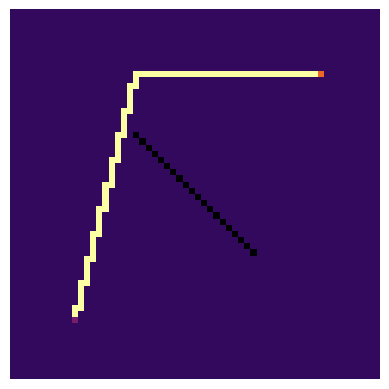

In [242]:
map_size = 60
start = Position(map_size - 10, 10)
end = Position(10, map_size - 10)
start_node = Node(start, start, end)
end_node = Node(end, start, end)

map = np.zeros((map_size, map_size))
for i in range(20, 40):
    map[i, i] = -1
path, closed_list = AStar.find_path(map, end_node, start_node)
print(len(path))
for node in closed_list:
    map[node.position.x, node.position.y] = 2
for node in path:
    map[node.position.x, node.position.y] = 5
map[start_node.position.x, start_node.position.y] = 1
map[end_node.position.x, end_node.position.y] = 3
map[map_size - 1, 0] = 0
plt.imshow(map, cmap='inferno')
plt.axis('off')